## 보스턴 집값 예측

<img src="assets/boston.png">

- 1970년대 매사추세츠주 보스턴에서 우리가 부동산 개발 회사에서 일하고 있다고 기장헤보자. 주거지 프로젝트를 시작하기 전에 평가해 보려고 한다. 우리는 아래와 같이 집의 특성에 따라 가격 견적서를 제공하는 모델을 만들어야 한다.
    - 방의 개수
    - 고용 센터까지의 거리
    - 지역의 경제력 수준
    - 지역 학교의 교사당 학생 수 등

- 우리가 이번 시간을 통해 배우거나 작업할 사항은 아래와 같다. 
    1. 보스턴 집의 가격 데이터를 분석, 연구
    2. 데이터를 훈련용과 테스트용으로 나누기
    3. 다변수 회귀 분석을 수행
    4. 모델의 계수와 잔차 평가
    5. 모델 성능을 개선하기 위해 데이터 변환 사용
    6. 모델을 이용해 부동산 가격을 감정
    
<img src="assets/model.png">

In [1]:
# 필요 모듈 임포트 
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 데이터 불러오기

In [2]:
# 데이터 불러오기
data = pd.read_csv('data/boston.csv', index_col=0)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 데이터 탐색

### 1. 기본 데이터 탐색

In [3]:
# 데이터 형태 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [4]:
# 결측치 확인 
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
# 중복값 확인 
data[data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


- 1차 데이터 탐색 결과는 아래와 같다 
    - 총 데이터 값 506건 / 컬럼수 14건 
    - 데이터 정보 
        - CRIM(float): 도시별 1인당 범죄율
        - ZN(float): 25,000 평방 피트를 초과하는 부지로 지정된 주거용 토지의 비율
        - INDUS(float): 도시당 비소매 사업 면적 비율(공장의 비율)
        - CHAS(float): Charles River 더미 변수(= 지역 경계가 강인 경우 1, 그렇지 않은 경우 0)
        - NOX(float): 산화질소 농도(1,000만분의 1)
        - RM(float): 주택당 평균 방 개수
        - AGE(float): 1940년 이전에 건축된 자가 거주 주택의 비율
        - DIS(float): 보스턴 고용 센터 5곳까지의 가중치 거리에 가중치 부여
        - RAD(float): 방사형 고속도로에 대한 접근성 지수
        - TAX(float): `$10,000`당 전체 재산세율
        - PTRATIO(float): 마을별 학생-교사 비율
        - B(float): 1000(Bk - 0.63)^2 여기서 Bk는 마을별 흑인 비율
        - LSTAT(float): 저소득층 지수
        - PRICE(float): 자가 거주 주택의 평균 가치(`$1000`)
    - 데이터 중복값과 NaN 값은 없음 

### 2. 통계적 수치 탐색
- 다음 질문에 답해보기 
    - 교사 1인당 평균 학생 수는 몇 명인가?
    - 데이터세트에 있는 주택의 평균 가격은 얼마인가?
    - CHAS 기능이 무엇인가?
    - 데이터 세트에서 주거지당 최대 및 최소 방 수는 얼마인가?

In [6]:
# 통계 수치 확인 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# 교사 1인당 평균 학생 수는 몇 명일까? 
print(f'교사 1인당 평균 학생 수는: {data.PTRATIO.mean()}')

# 주택의 평균 가격은 얼마인가?
print(f'주택의 평균 가격은: {data.PRICE.mean() * 1000}')

# 주거지당 최대 및 최소 방 개수는 얼마인가? 
print(f'주거지당 최소 방의 개수는: {data.RM.min()}, 주거지당 최대 방의 개수: {data.RM.max()}')

교사 1인당 평균 학생 수는: 18.455533596837945
주택의 평균 가격은: 22532.806324110676
주거지당 최소 방의 개수는: 3.561, 주거지당 최대 방의 개수: 8.78


- 교사 1인당 평균 학생 수는 약 18명이다.
- 주택의 평균 가격은 22,532 달러이다. 이후 인플레이션 영향으로 집값은 더 상승 했을 것이다,  
- CHAS의 기능은 무엇인가? CHAS는 집이 찰스 강 옆에 있는지 여부를 보여준다. 해당 값이 0 또는 1값만 있는데, 이런 종류의 특성을 더미 변수라고도 한다. 

<img src="assets/Longfellow_pru.jpg">

기능 시각화
과제: 몇 가지 기술 통계를 살펴본 후 모델에 대한 데이터를 시각화합니다. Seaborn의 .displot()을 사용하여 막대 차트를 만들고 다음 변수에 대해 KDE(Kernel Density Estimate)를 겹쳐 놓습니다.

가격: 주택 가격(단위: 천)입니다.
RM: 소유자 단위당 평균 객실 수입니다.
DIS: 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이.
RAD: 고속도로 접근성 지수.
더 나은 사진을 얻으려면 화면비 매개변수를 2로 설정해 보세요.

데이터 분포에서 무엇을 발견했나요?

### 3. 데이터 시각화 - 데이터 분석
- 데이터 시각화 기준 데이터들 
    - PRICE: 주택 가격(단위: 천)
    - RM: 소유자 단위당 평균 객실 수
    - DIS: 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이
    - RAD: 고속도로 접근성 지수
    - CHAS: 찰스강 옆에 집이 있는지 여부 

#### PRICE - 주택 가격 

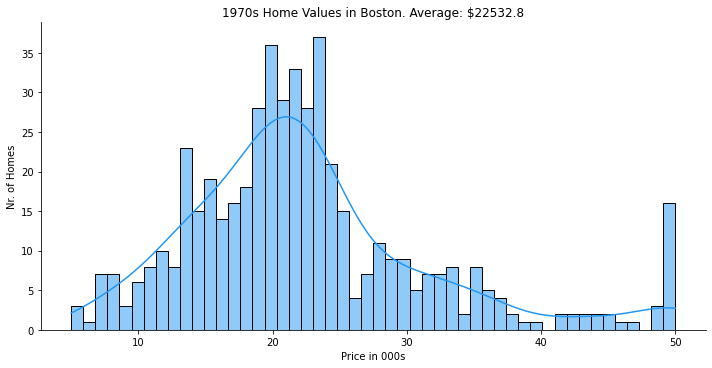

In [8]:
# 주택 가격 기준 히스토그램 출력
sns.displot(data=data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

- 5맨 오른쪽 끝부분 50,000불 지점에서 주택 수가 급증한 것을 알 수 있다.

#### DIS - 보스턴 고용 센터 5개까지의 가중 거리, 즉 예상 통근 길이

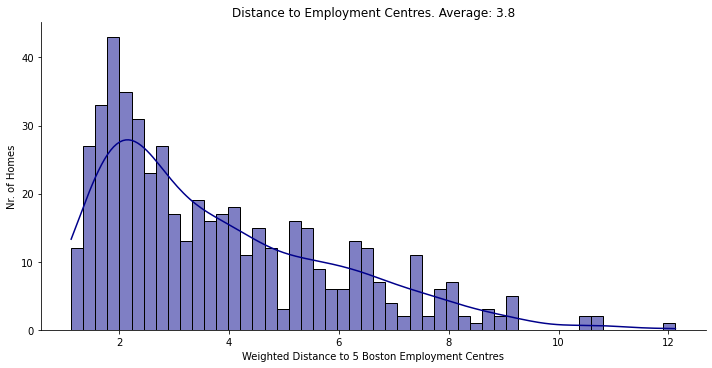

In [9]:
sns.displot(data=data['DIS'], 
            bins=50, 
            aspect=2,
            kde=True,
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

- 대부분 집은 직장에서 3.8 마일(6.12km) 떨어져 있다. 멀리 갈수록 집이 점점 줄어들고 있다,

#### RM - 소유자 단위당 평균 객실 수

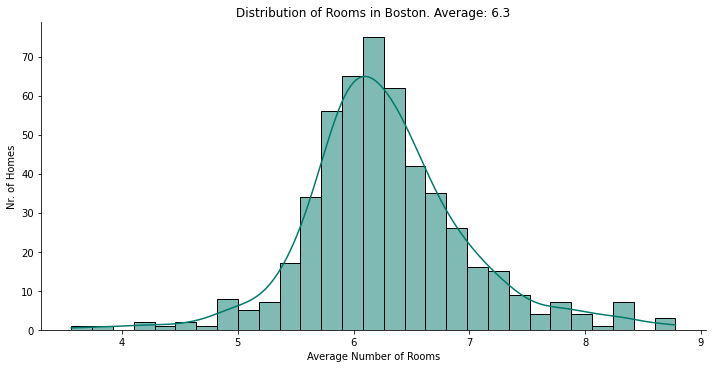

In [10]:
sns.displot(data=data['RM'], 
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### RAD - 고속도로 접근성 지수 

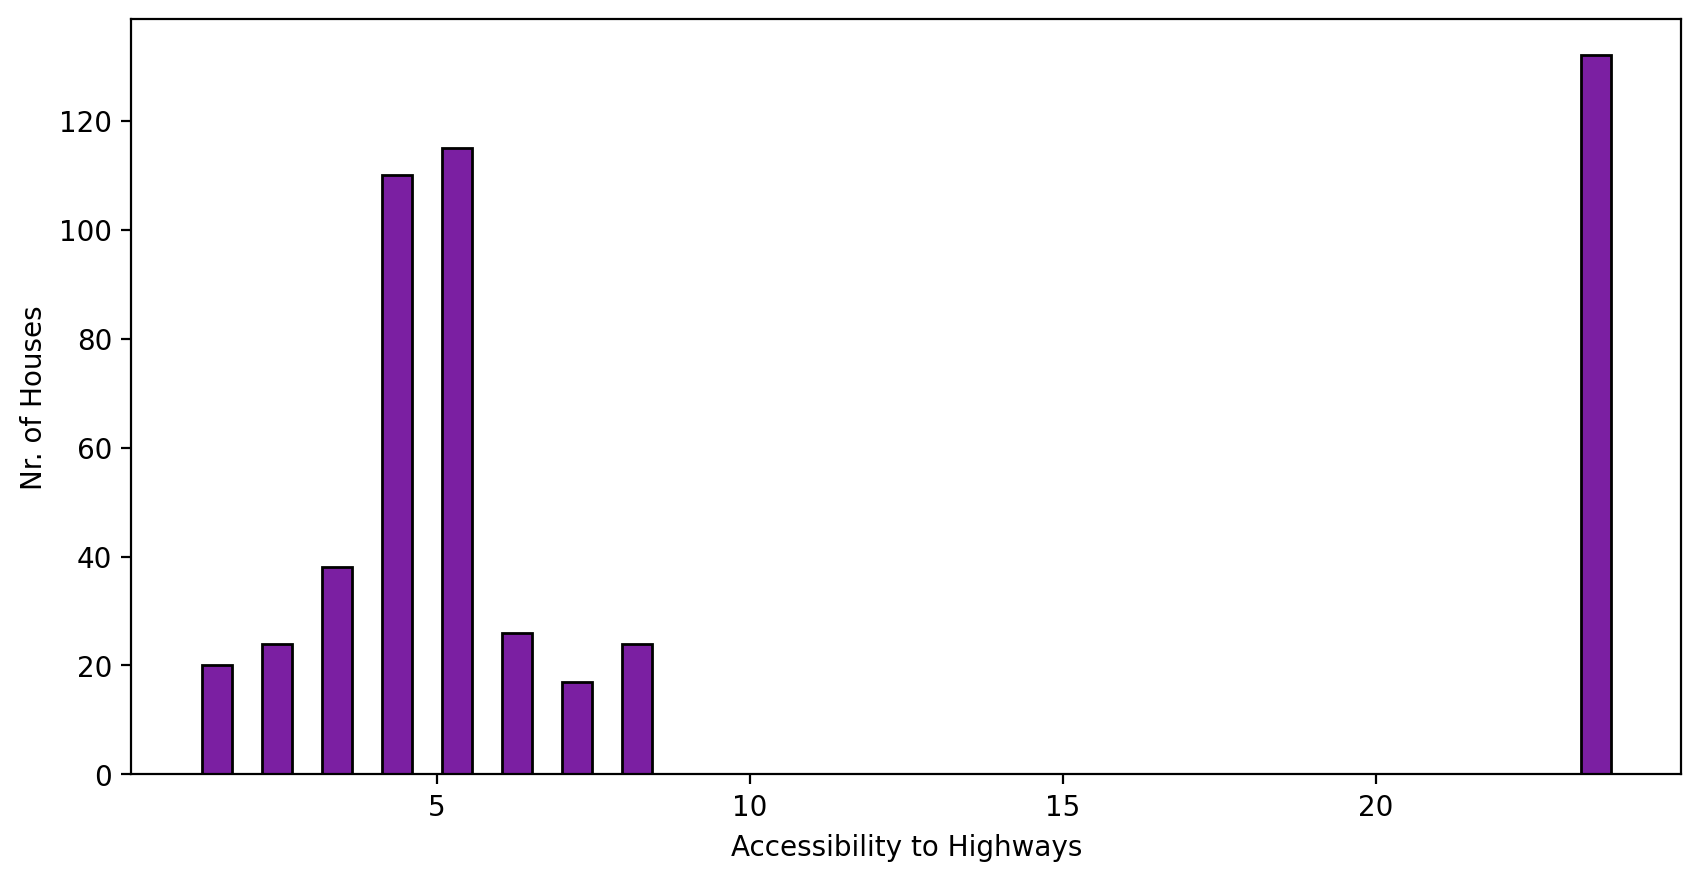

In [11]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

- RAD는 도로 접근성 지수이다. 고속도로에 더 나은 접근성이 높은 숫자로 나타난다. 지수의 가치에는 크게 차이가 없다.

#### 집 위치가 찰스 강 옆인지 아닌지?

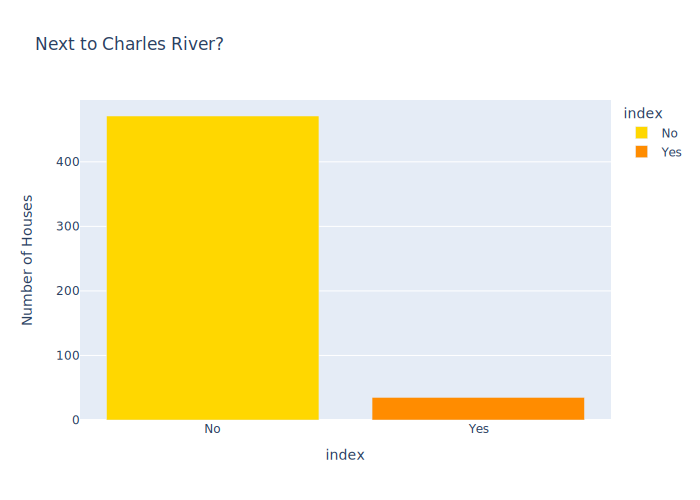

In [12]:
cha_count = data.CHAS.value_counts()

cha_count.index = ['No' if idx == 0 else 'Yes' for idx in cha_count.index]

fig = px.bar(cha_count, 
             x=cha_count.index,
             y=cha_count.values,
             labels={'x': 'Property Located Next to the River?', 'y': 'Number of Houses'},
             color=cha_count.index,
             color_discrete_map={'No': '#FFD700', 'Yes':'#FF8C00'},
             title='Next to Charles River?')

fig.show(renderer='svg')

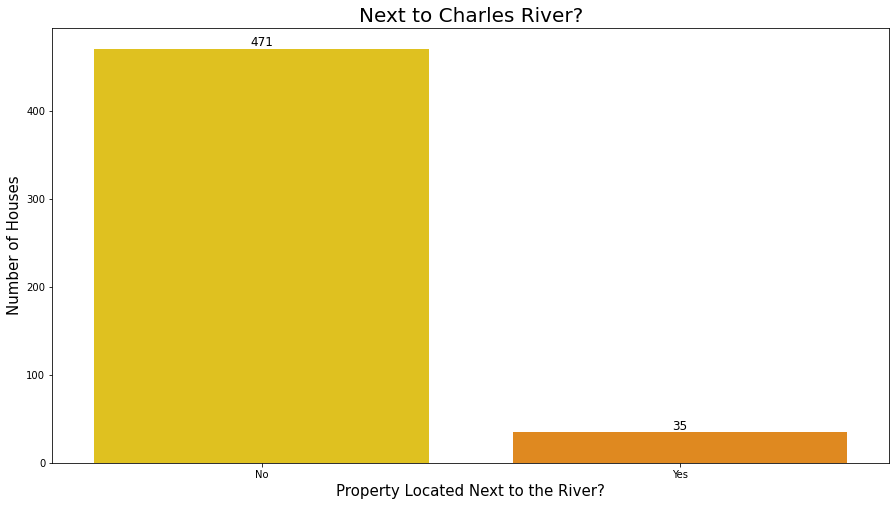

In [13]:
# seaborn 버전
cha_count = data.CHAS.value_counts()

cha_count.index = ['No' if idx == 0 else 'Yes' for idx in cha_count.index]

plt.figure(figsize=(15, 8))

# seaborn을 사용하여 막대 그래프 그리기
barplot = sns.barplot(x=cha_count.index, y=cha_count.values, palette={'No': '#FFD700', 'Yes':'#FF8C00'})

# 각 막대에 라벨 추가
for idx, value in enumerate(cha_count.values):
    barplot.text(idx, value + 3, str(value), ha='center', fontsize=12)

# 라벨과 제목 추가
plt.xlabel('Property Located Next to the River?', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)
plt.title('Next to Charles River?', fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

- 찰스 강 옆에 집은 소수가 가지고 있었다. 아무래도 강 옆의 집값이 대체적으로 비싸기 때문이다.

### 4. 데이터 탐색 (EDA)
- 해당 데이터에는 우리가 알아야할 몇 가지 관계가 있을 수도 있다. 그 전에 몇 가지 예측 질문을 해보자!
    - 오염(NOX)과 고용 거리(DIS) 사이에 어떤 관계가 있을 것으로 예측되는가? 
    - 주택당 평균 방 개수(RM)와 주택 가치(PRICE) 사이에 어떤 관계가 있을 것으로 예상되는가?
    - 해당 지역의 빈곤율(LSTAT)과 주택 가격은 어떠한가? 

#### Pairplot으로 살펴보기 

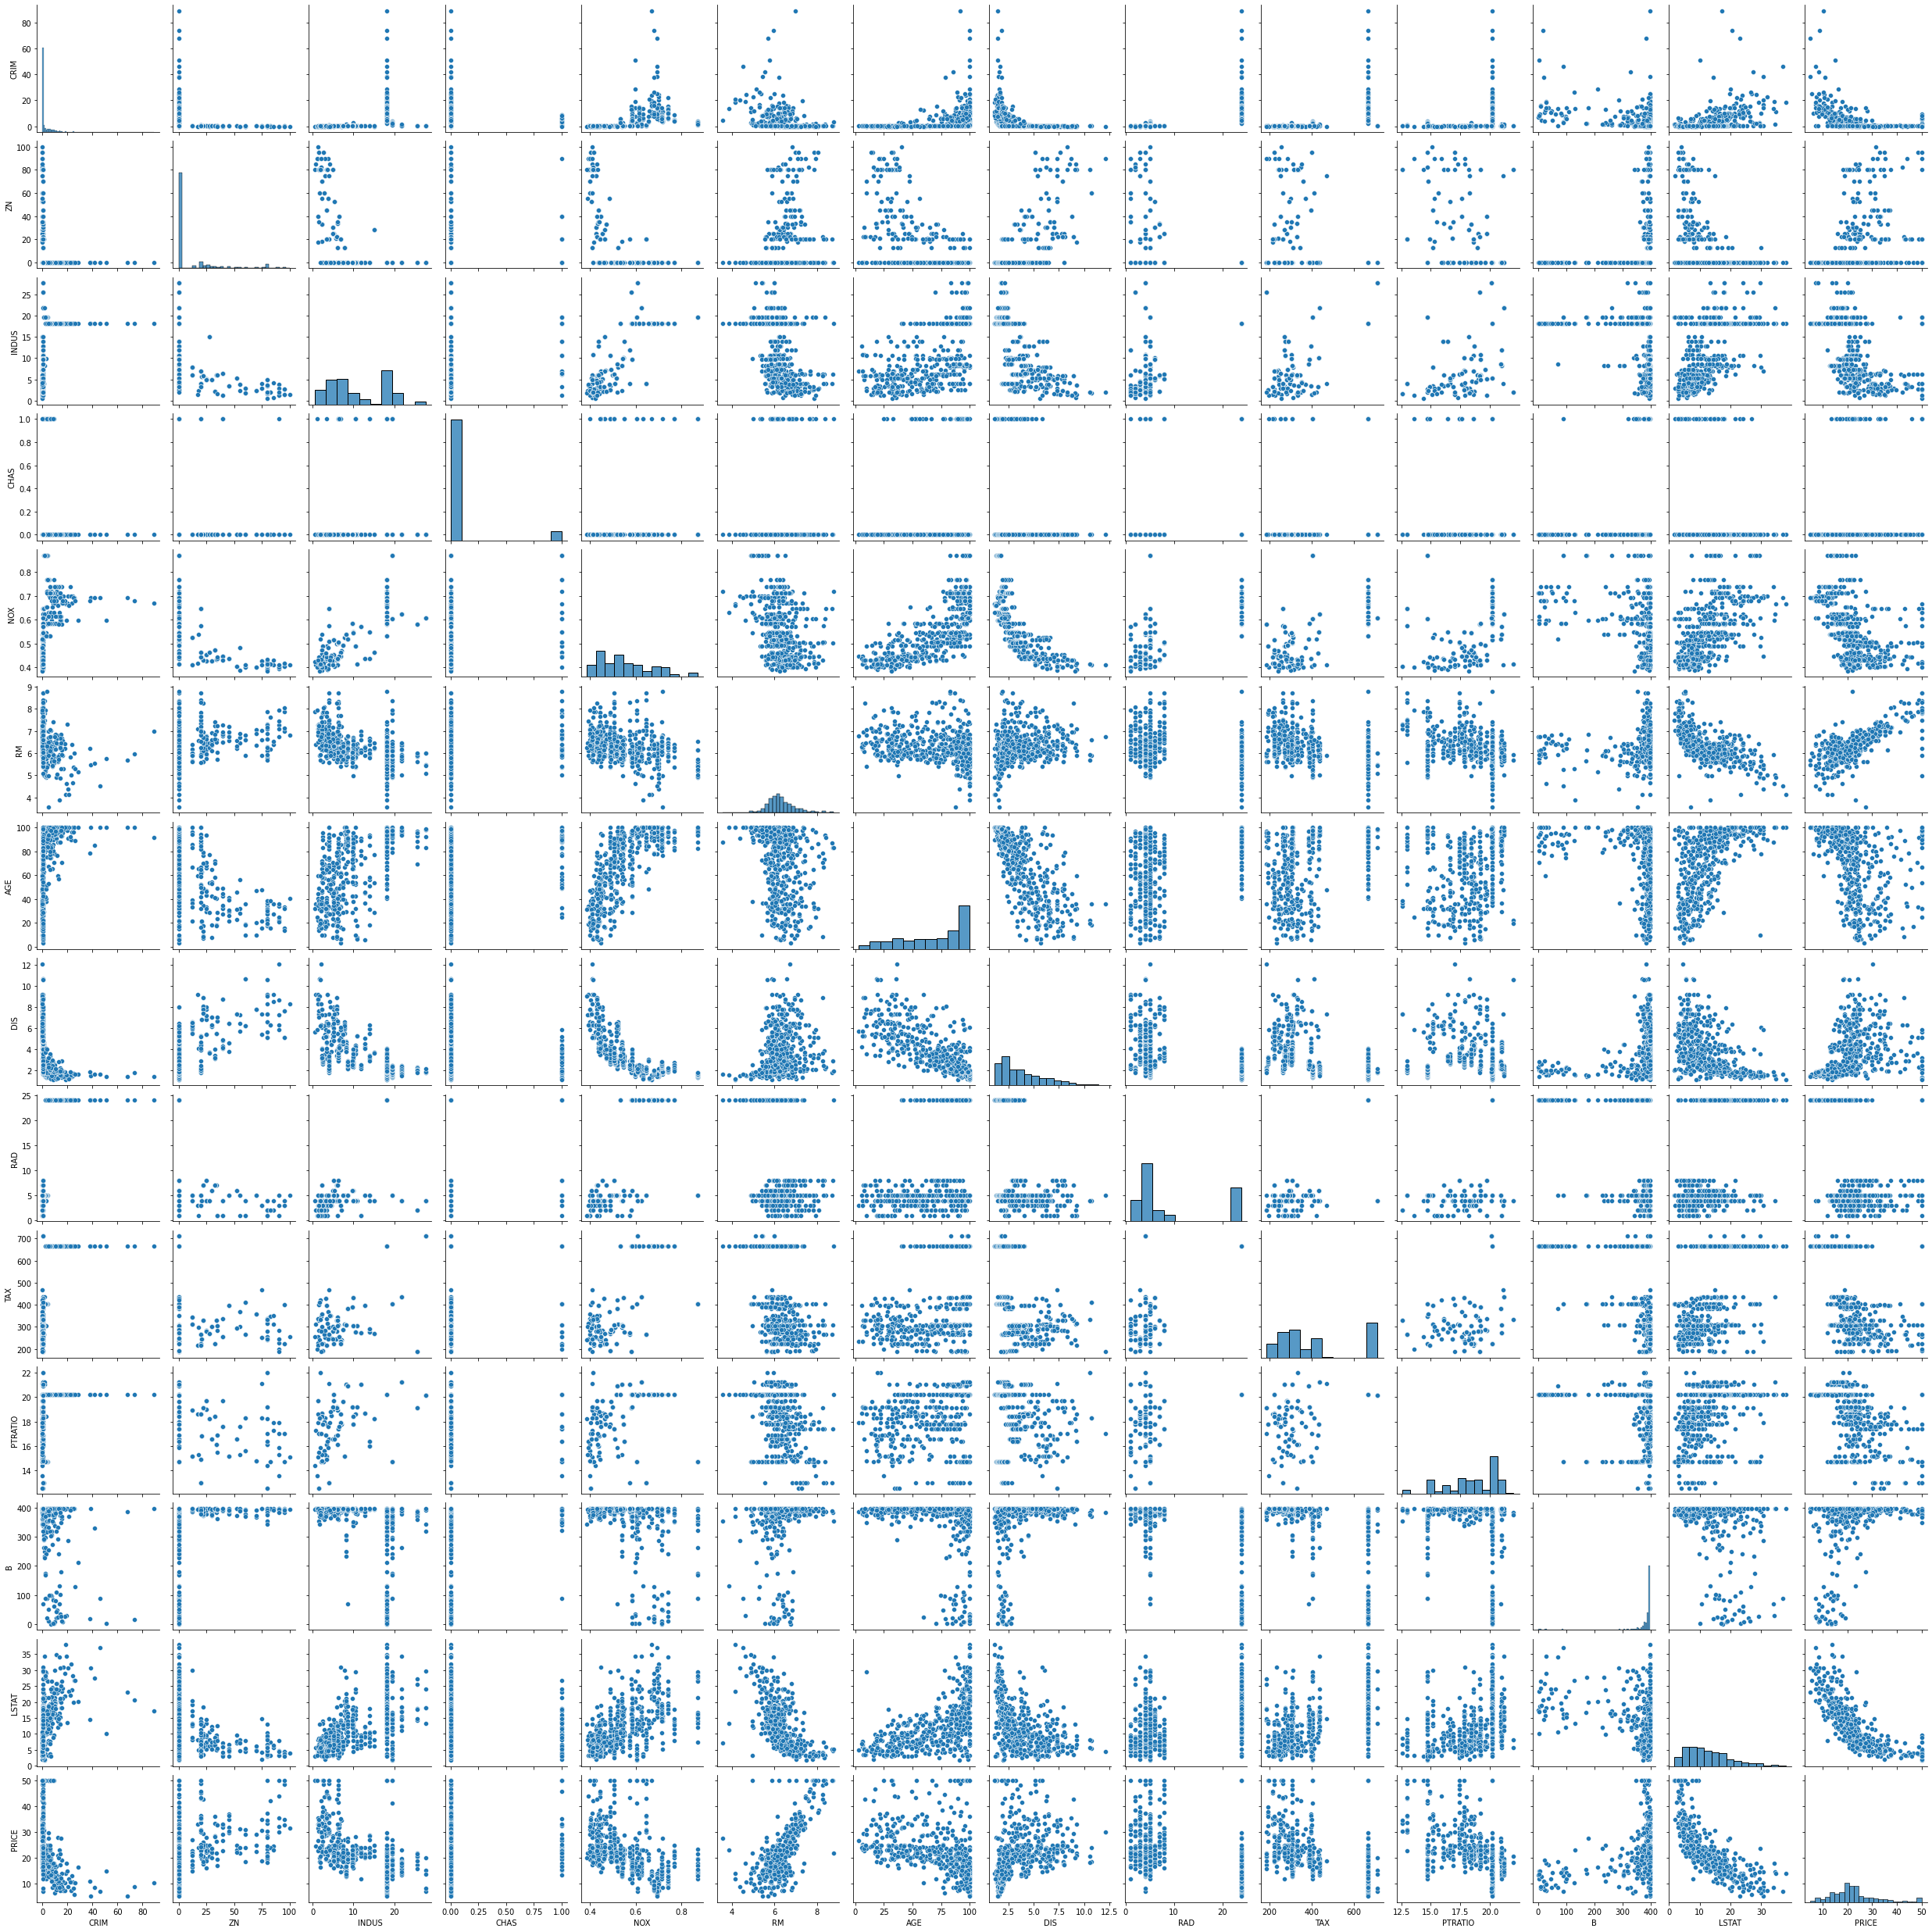

In [14]:
# pairplot 그리기 
sns.pairplot(data)

# 회귀선을 포함할 수도 있음
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': '시안색'}})

plt.show()

- 조금 확대하거나 눈을 가늘게 뜨고 봐야 할 수도 있지만, 각 그리드의 변수간의 관계를 그리는 그래프를 하나씩 그리고 데이터 세트의 모든 열 사이에는 산점도가 있으며, 중앙 대각선 아래에는 모든 열에 대한 히스토그램이 표시된다.

#### Joint Plot으로 살펴보기
- Joint Plot은 두개의 수치형 변수간의 관계를 볼 수 있는 그래프이다.
- Joint Plot으로 살펴 볼 데이터들은 다음과 같다 
    - 보스턴 고용센터 까지의 가중치 거리 vs 산화질소 농도(오염도)
    - 도시당 비소매 사업 면적 비율 vs 산화질소 농도(오염도)
    - 저소득층 지수 vs 주택당 평균 방 개수
    - 저소득층 지수 vs 주택 가격
    - 주택당 방개수 vs 주택 가격 

##### 보스턴 고용센터 까지의 가중치 거리 vs 산화질소 농도(오염도)

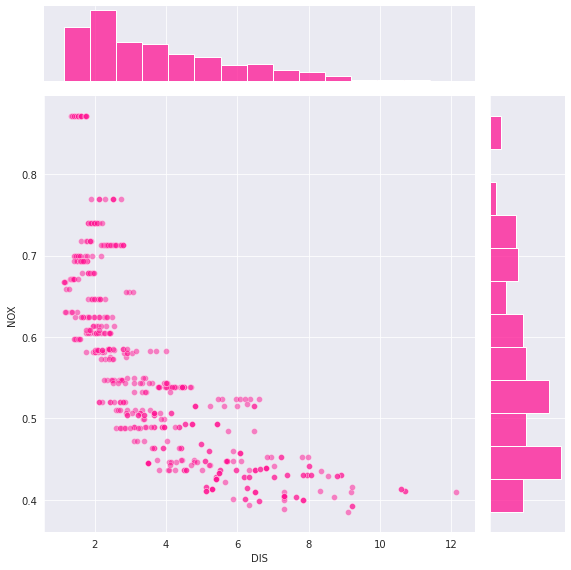

In [15]:
# joint plot 그리기 
with sns.axes_style('darkgrid'):             # 그래프 스타일 설정 - 다크 그리드
    sns.jointplot(x=data['DIS'],             # 그래프 설정 - x축 데이터: 고용 센터 까지의 거리
                  y=data['NOX'],             # y축 데이터: 오염도 
                  height=8,                  # 높이 설정 
                  kind='scatter',            # 중앙 그래프 설정 - 산점도 
                  color='deeppink',          # 그래프 색상 설정 
                  joint_kws={'alpha':0.5})   # 산점도 투명도 설정

plt.show()

- 고용센터 거리와 오염도를 비교해 본 결과, 도시 밖으로 멀리 갈수록 오염도는 감소하는 것으로 나타났다. 이는 직관적으로 이해가 가능하다. 
- 거리가 동일한 2마일 이라도 오염 수준은 다르게 나타나고, 9마일과 12마일의 DIS는 오염 수준이 매우 비슷한 성향을 나타낸다. 고용 센터까지의 거리당 오염도가 다를 수도 비슷할 수도 있다.

##### 도시당 비소매 사업 면적 비율(공장의 비율) vs 산화질소 농도(오염도)

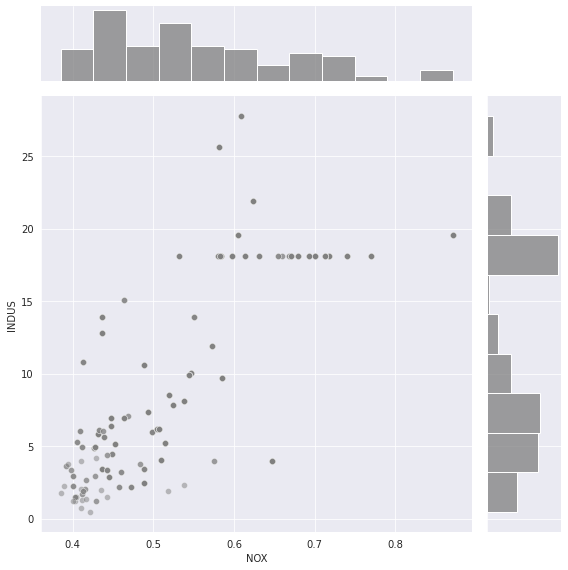

In [16]:
# joint plot 그리기 
with sns.axes_style('darkgrid'):             # 그래프 스타일 설정 - 다크 그리드
    sns.jointplot(x=data['NOX'],             # 그래프 설정 - x축 데이터: 공장 비율
                  y=data['INDUS'],           # y축 데이터: 오염도 
                  height=8,                  # 높이 설정 
                  kind='scatter',            # 중앙 그래프 설정 - 산점도 
                  color='gray',              # 그래프 색상 설정 
                  joint_kws={'alpha':0.5})   # 산점도 투명도 설정

plt.show()

- 공장 비율과 오염도를 비교해 본 결과, 공장이 많지 않은 곳에는 오염도가 낮고 공장이 많은 곳에은 오염도가 높게 나타났다.

##### 저소득층 지수 vs 주택당 평균 방 개수

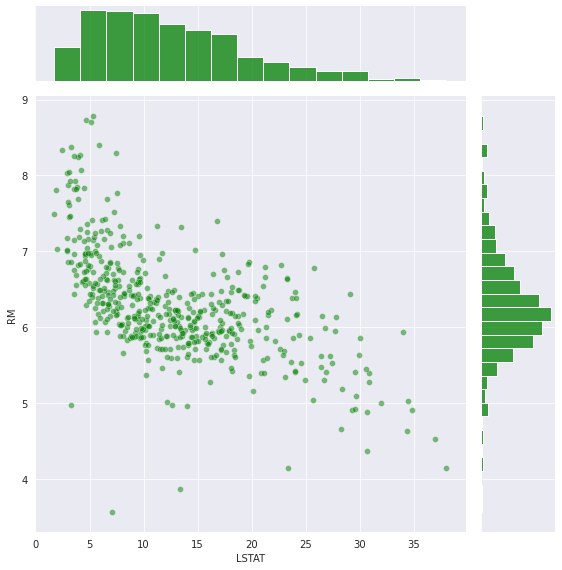

In [17]:
# joint plot 그리기 
with sns.axes_style('darkgrid'):             # 그래프 스타일 설정 - 다크 그리드
    sns.jointplot(x=data['LSTAT'],           # 그래프 설정 - x축 데이터: 저소득층 비율
                  y=data['RM'],              # y축 데이터: 주택당 평균 방 개수 
                  height=8,                  # 높이 설정 
                  kind='scatter',            # 중앙 그래프 설정 - 산점도 
                  color='green',             # 그래프 색상 설정 
                  joint_kws={'alpha':0.5})   # 산점도 투명도 설정

plt.show()

- 왼쪽 상단에서 방이 8개 이상인 모든 주택의 LSTAT가 10% 보다 훨씬 낮다. 즉, 소득 수준이 높을 수록 방의 개수는 많은 것으로 확인된다.

##### 저소득층 지수 vs 주택 가격

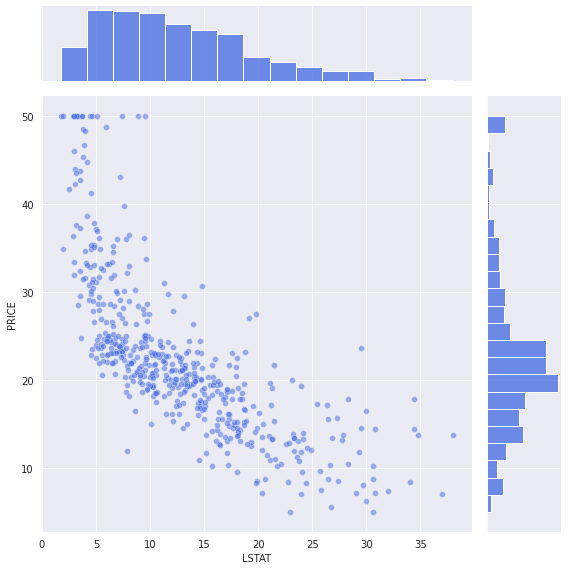

In [18]:
# joint plot 그리기 
with sns.axes_style('darkgrid'):             # 그래프 스타일 설정 - 다크 그리드
    sns.jointplot(x=data['LSTAT'],           # 그래프 설정 - x축 데이터: 저소득층 비율
                  y=data['PRICE'],           # y축 데이터: 주택 가격
                  height=8,                  # 높이 설정 
                  kind='scatter',            # 중앙 그래프 설정 - 산점도 
                  color='royalblue',         # 그래프 색상 설정 
                  joint_kws={'alpha':0.5})   # 산점도 투명도 설정

plt.show()

- 저소득층 비중이 낮을(고소득자)수록 주택 가격은 높게 나타난다. 즉, 고소득자들은 비교적 비싼 주택을 저소득자들은비교적 저렴한 주택을 구매하는 것으로 나타났다.

##### 주택당 방개수 vs 주택 가격

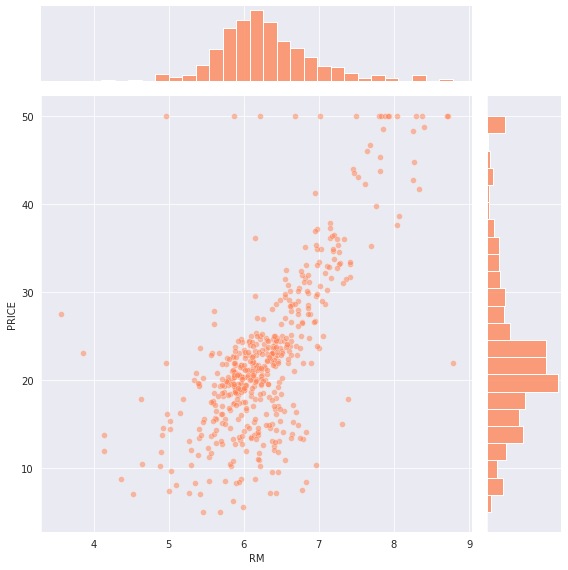

In [19]:
# joint plot 그리기 
with sns.axes_style('darkgrid'):             # 그래프 스타일 설정 - 다크 그리드
    sns.jointplot(x=data['RM'],              # 그래프 설정 - x축 데이터: 주택당 평균 방 개수
                  y=data['PRICE'],           # y축 데이터: 주택 가격
                  height=8,                  # 높이 설정 
                  kind='scatter',            # 중앙 그래프 설정 - 산점도 
                  color='coral',             # 그래프 색상 설정 
                  joint_kws={'alpha':0.5})   # 산점도 투명도 설정

plt.show()

- 마지막으로 방의 개수 대비 주택 가격은 어떨까? 방의 개수가 많은 주택일수록 높은 가격대에 형성되는 것으로 나타난다. 하지만 `$50,000` 수준의 주택 데이터를 보면 8개 이하의 방개수의 주택이 꽤 보인다(`$50,000` 수준의 주택이 모두 차트 상단에 정렬되어 있는 것을 볼 수 있다). 이는 아마도 데이터 수집 중에 부과된 일종의 상한선이나 최대값이 있었을 것으로 보여진다.

### 5. 훈련 및 테스트 데이터세트 분할 
- 데이터 세트의 506개 항목을 모두 사용하여 모델을 학습 시킬 수는 없다. 그 이유는 아직 보지 못한 데이터(예: 샘플 외부 데이터)에 대해 모델을 평가하고 싶기 때문이다. 
- 이렇게 하면 현실 세계에서의 성능에 대해 더 나은 아이디어를 얻을 수 있다.

In [20]:
# 타겟과 특성 데이터 설정
target = data['PRICE']                        # 예측하고자 하는 데이터 설정
feature = data.drop('PRICE', axis=1)          # 가격을 예측하는데 사용하는 특성들 

# 훈련, 테스트 데이터 나누기 
# 데이터셋을 훈련 데이터와 테스트 데이터로 분할 (대략 80/20 비율)
# random_state=10을 설정하여 실행할 때마다 동일한 분할로 얻기.
X_train, X_test, y_train, y_test = train_test_split(feature,           # 가격을 예측하는데 사용하는 특성들 
                                                    target,            # 에측하고자 하는 데이터 
                                                    test_size=0.2,     # 데이터 분할 비율 (feature:80 / target:20)
                                                    random_state=10)   # 무작위 분할 

In [21]:
# 분할한 데이터 비율 확인 

# 훈련 데이터 - Feature
train_pct = 100 * len(X_train) / len(feature)                   # 100 x X_train 데이터 수 / feature 데이터 수 
print(f'Training data is {train_pct:.3}% of the total data.')

# 테스트 데이터  
test_pct = 100 * X_test.shape[0] / feature.shape[0]             # 100 x X_test 데이터 수 / feature 데이터 수 
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


- 예측 모델을 만들기 위해 훈련 데이터와 테스트 데이터를 나눈다. 
- 여기서 예측하고자 하는 데이터가 Test 데이터(Target 데이터)가 될 것이고, 그 예측을 하기 위해 사용되는 Train 데이터(Feature 데이터)가 된다. 
- 훈련 데이터와 테스트 데이터의 비율은 80 대 20으로 나누고 무작위로 분할하였다.

## 다변수 회귀 
- 이전 시간에 단일 특성(영화 예산)만 포함하는 선형 모델을 사용했는데, 이번에는 총 13개의 Feature를 이용해서 다변수 회귀를 사용하고자 한다. 
- 해당 선형 회귀 모델은 아래와 같은 형식을 갖춘다. 

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

- 선형 회귀는 종속 변수와 한 개이상의 독립 변수 간의 선형 관계를 모델링하는 회귀 분석의 한 방법이다. 이 모델에서는 PRÎCE는 예측하고자 하는 종속 변수(목표 변수)를 나타내며, 나머지 "RM, NOX, DIS, CHAS, ..., LSTAT"는 독립 변수(특성)을 나타낸다.
- 각 독립 변수는 집 값에 영향을 미치는 요소를 나타낸다. 예를 들어, "RM"은 주택의 평균 방 개수, "NOX"는 일산화질소 농도 등 실제 주택 데이터에서 나타나는 다양한 특성을 나타낼 수 있다.
- 여기서, PRÎCE는 모델을 통해 예측된 주택 가격이다. (𝜃0+𝜃1𝑅𝑀+𝜃2𝑁𝑂𝑋+𝜃3𝐷𝐼𝑆+𝜃4𝐶𝐻𝐴𝑆...+𝜃13𝐿𝑆𝑇𝐴𝑇)은 모델 파라미터로, 이들은 훈련 과정에서 데이터로부터 학습된다. 
- 𝜃0은 절편(intercept)를 나타내고, 𝜃1𝑅𝑀 부터 𝜃13𝐿𝑆𝑇𝐴𝑇 까지의 파라미터는 각 독립 변수의 가중치를 나타낸다. 이 가중치들은 해당 독립 변수가 종속 변수에 미치는 영향의 크기와 방향을 나타낸다.

- 선형 회귀 모델은 다음과 같은 특성을 가진다.
    - 선형성: 종속 변수와 독립 변수 간의 관계가 선형이라고 가정함.
    - 가변성: 독립 변수의 가중치는 모델이 데이터로부터 학습하는 값이다.
    - 가법성: 각 독립 변수의 영향은 다른 변수의 영향과 독립적으로 더해진다.
- 이 모델은 주택 가격 예측과 같은 회귀 문제를 해결하기 위해 널리 사용된다. 모델의 성능은 사용되는 데이터와 모델이 얼마나 잘 학습되었는지에 달려 있다.

### 1. 첫 번째 회귀 실행 
- sklearn을 사용해서 Train 데이터 세트에 대한 회귀를 실행할 수 있다. 여기서 Train 데이터의 회귀에 대한 r-제곱은 얼마나 높을까? 

In [22]:
# 사이킷 런의 선형 회귀와 r2스코어 모듈 불러오기 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 회귀 모델 정의 및 Train 데이터셋에 모델 적합 시키기 
model = LinearRegression()
model.fit(X_train, y_train)

# Train 데이터셋에 대한 예측 수행 
y_train_pred = model.predict(X_train)

# Train 데이터셋에 대한 R2 값 계산
r2 = r2_score(y_train, y_train_pred)

print(f"Training data r-squared: {r2:.2}")

Training data r-squared: 0.75


- Train 데이터셋에 대한 회귀 모델의 R^2(결정 계수) 값을 계산하려면, 먼저 사이킷런(sklearn)의 회귀 모델을 Train 데이터셋에 적합(fit)시킨 후, 같은 훈련 데이터셋에 대해 모델의 R^2 값을 계산하면 된다.
- 여기 Train 데이터셋에 대한 회귀 모델 성능, R2 값은 0.75(75%)로 매우 높게 나왔다(R2 값이 높을수록 모델이 데이터에 더 잘맞는다는 의미). 

### 2. 모델의 계수(변수(문자)에 일정하게 곱해진 상수(숫자)) 평가
- 여기서 회귀 계수에 대한 의미 검사를 수행한다. 가장 먼저 찾아야 할 것은 계수에 예상되는 부호(양수 또는 음수)가 있는지 이다.

- 우리는 계수를 확인하면서 아래의 질문들을 생각해볼 필요가 있다.
    - 우리는 분산형 차트를 기반으로 RM(주택당 평균 방 개수) 자체가 PRICE(주택 가격)와 양의 관계를 가지고 있다는 것을 이미 확인했다. RM의 계수도 양수인가? 
    - LSTAT(저소득층 지수) 계수의 부호는 무엇일까? 우의 산점도와 일치할까? 
    - 다른 계수를 확인했을 때 예상되는 표시가 존재하는가? 
    - 계수로 볼 때 6개 방이 5개 방에 비해 얼마나 더 비싼가? 모델에 따르면, 추가 객실에 대해 지불해야 하는 프리미엄은 얼마인가?

In [23]:
# 특성 이름과 계수를 매핑하여 데이터프레임 생성
coefficients = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient'])

# 계수 출력
coefficients

,Coefficient
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


- 모델의 계수를 출력하려면 모델이 이미 훈련되어 있어야 한다. 
- 계수는 model.coef_ 속성에 저장되어 있으며, 이를 이용하여 특성(변수)에 대한 계수를 출력할 수 있다.

In [24]:
# 추가 객실에 대해 지불해야 하는 프리미엄 계산
premium = coefficients.loc['RM'].values[0] * 1000  # 출력된 계수 X 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### 3. 추정값 및 회귀 잔차 분석
- 다음 단계는 회귀를 평가한다. 해당 회귀 분석이 얼마나 좋은지 알아보기 위해 R-제곱 값에만 의존하지 않는다. 
- 바로 잔차(모델 예측 간의 사이 역기서 (𝑦̂𝑖)) 및 실제 값(𝑦𝑖) y_train 내부에 따라 달라진다.
- 잔차 분석시 공식은 아래와 같다.
    - 예측 값 = reg.predict(X_train)
    - 잔차 = (Y_train - 계산한 예측 값)

In [25]:
# 잔차 계산
predicted_values = model.predict(X_train)     # 예측 값 계산
residuals = (y_train - predicted_values)      # 잔차 계산 

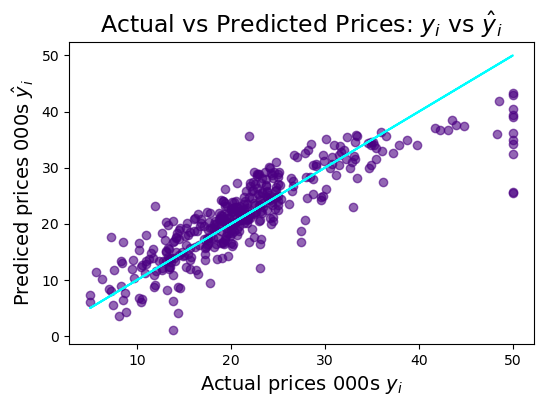

In [26]:
# 실제 가격과 예측 가격의 회귀 
plt.figure(dpi=100)                                                          # 그래프 해상도 설정
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)            # 산점도 그래프 설정 - x축 데이터: 실제 가격, y축 데이터: 예측된 가격, 점 색상 및 투명도 설정 
plt.plot(y_train, y_train, color='cyan')                                     # 두 y_traind을 각각 x축 y축의 값으로 사용하여, 실제 가격이 예측 가격와 일치하는지 선을 그림 
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)  # 그래프 제목 설정 
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)                         # x축 레이블 설정 - 실제 가격
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)                  # y축 레이블 설정 - 예측 가격
plt.show()

- 위 그래프는 실제 가격과 예측된 가격을 비교하기 위한 산점도 그래프 이다. 
- 해당 그래프를 통해 모델이 얼마나 잘 예측하는지 시각적으로 평가할 수 있다.
- 산점도 위의 점들이 시안색 선 주변에 밀집해 있을수록, 모델의 예측이 실제 가격에 가까움을 의미한다. 

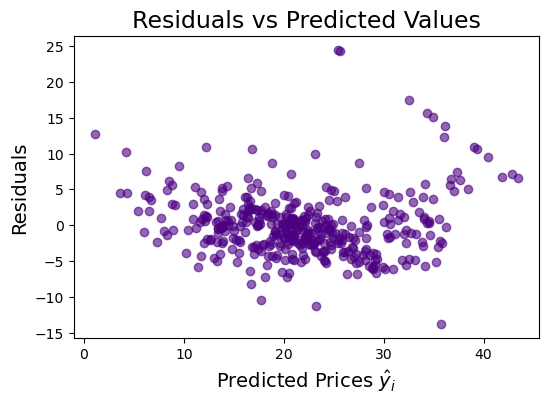

In [27]:
# 잔차와 예측값 회귀 
plt.figure(dpi=100)                                                  # 그래프 해상도 설정
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)  # 산점도 그래프 설정 - x축 데이터: 예측 가격, y축 데이터: 잔차, 점 색상 및 투명도 설정 
plt.title('Residuals vs Predicted Values', fontsize=17)              # 그래프 제목 설정 
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)              # x축 레이블 설정 - 예측 가격 
plt.ylabel('Residuals', fontsize=14)                                 # y축 레이블 설정 - 잔차
plt.show()

- 위 그래프는 예측된 가격과 잔차 사이의 관계를 나타낸다. 
- 잔차는 실제 값과 예측 값 사이의 차이를 의미하며, 모델 성능을 평가하는데 중요한 지표 중 하나이다(모델의 예측 값이 실제 값과 얼마나 일치하는지 파악할 수 있게 해준다).
- 잔차가 무작위로 분포되어 있고 특정 패턴을 보이지 않을 때, 모델이 데이터를 잘 적합하고 있다고 볼 수 있다. 반면, 잔차가 특정 패턴을 보인다면 모델이 데이터의 일부 패턴을 놓치고 있을 수 있음을 의미한다.

In [28]:
# 잔차의 평균과 왜도 계산 
residuals_mean = round(residuals.mean(), 2)
residuals_skew = round(residuals.skew(), 2)

print(f'Residuals Skew ({residuals_skew}) Mean ({residuals_mean})')

Residuals Skew (1.46) Mean (-0.0)


- 왜도(Skewness)는 데이터의 비대칭 정도를 나타내는 통계량으로, 완전한 대칭 분포의 경우 왜도는 0을 나타낸다.
- 왜도가 양수인 경우 데이터는 오른쪽(긍정적인 값 방향)으로 치우쳐 있으며, 음수인 경우 왼쪽(부정적인 값 방향)으로 치우쳐 있다. 
- 잔차의 평균과 왜도를 통해 모델의 예측 성능을 평가하고, 잔차의 분포 특성을 이해하는데 도움이 된다. 예를 들어 잔차의 평균이 0에 가까우면 모델이 예측을 잘하고 있다고 볼 수 있고, 왜도를 통해 잔차의 분포가 얼마나 비대칭인지 가늠할 수 있다. 

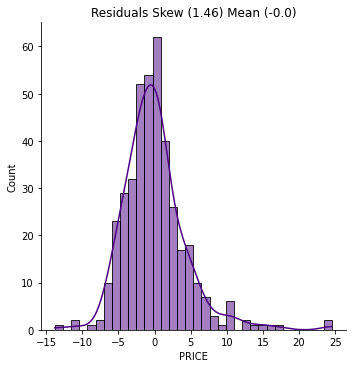

In [29]:
# 계산한 잔차의 분포 시각화 - 커널 밀도 추정(KDE) 곡선 추가 
sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({residuals_skew}) Mean ({residuals_mean})')
plt.show()

- 잔차의 분포 분석으로 우리는 편향과 평균에 대해 관심을 가지게 된다. 
- 이상적인 경우, 우리가 가장 원하는 것은 정규 분포에 가깝게 되는 것인데, 이는 정규 분포의 왜곡도와 평균이 0을 나타내는 것이다. 
- 현재 잔차의 왜도는 1.46임을 알 수 있는데, 여기에서 모델 개선의 여지가 있을 수 있다.

### 4. 더 나은 적합성을 위한 데이터 변환 
- 이 시점에서 두 가지 옵션이 있다. 
    1. 모델을 완전이 변경하기 
    2. 선형 모델에 적합하도록 데이터 변환

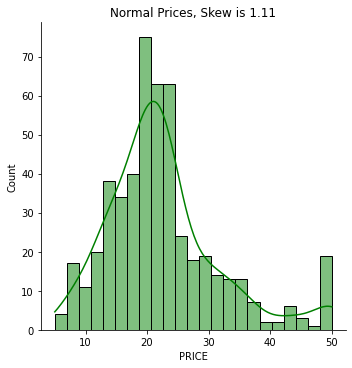

In [30]:
# 잡 값의 비대칭도를 계산하여 로그 변환 적용 여부를 판단하기 위한 시각화 
target_skew = data['PRICE'].skew()                      # 타겟 데이터(집 값)가 로그 변환에 적합한 후보가 될 수 있는지 조사 
sns.displot(data['PRICE'], kde='kde', color='green')    # 집 값 데이터의 히스토그램과 KDE(커널 밀도 추정) 표시
plt.title(f'Normal Prices, Skew is {target_skew:.3}')   # 그래프 제목 설정 
plt.show()

- 위의 그래프는 집 값의 비대칭도를 계산하여 로그 변환 적용 여부를 판단하기 위한 시각화이다. 
- 왼쪽으로 살짝 늘어지긴 했지만, 그렇게 크지는 않다.

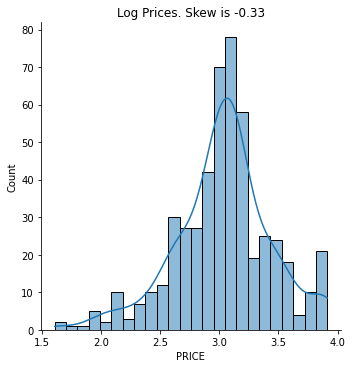

In [31]:
# 집 값 데이터의 로그 변환을 적용하 후, 변환 데이터의 분포를 시각화
y_log = np.log(data['PRICE'])              # 'PRICE' 데이터에 자연 로그 변환을 적용
sns.displot(y_log, kde=True)               # 로그 변환된 데이터의 히스토그램과 KDE를 함꼐 그림 
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

- 집 값 데이터에 로그 변환을 적용하고, 변환된 데이터의 분포와 비대칭도를 시각적으로 분석하며, 로그 변환 이후 데이터가 얼마나 정규 분포에 가까워졌는지 확인하는 과정을 수행한다.
- 로그 가격의 편향은 0에 가깝다. 이는 선형 모델에 사용하기에 좋은 후보가 된다. 아마도 로그 가격을 사용하면 회귀의 r-제곱과 모델의 잔차가 향상될 것이다. 

### 5. 로그 변환은 어떻게 동작할까?
- 로그 변환을 사용한다고 해서 모든 가격에 동일하게 영향을 미치는 것은 아니다. 데이터 세트에서 큰 가격은 작은 가격보다 더 큰 영향을 받는다. 
- 로그 변환을 통해 가격이 "압축"되는 방법은 아래와 같다. 

<img src="assets/transform_log.png">

- (변환된) 로그 가격에 대해 실제 가격을 표시하면 이를 확인할 수 있다.

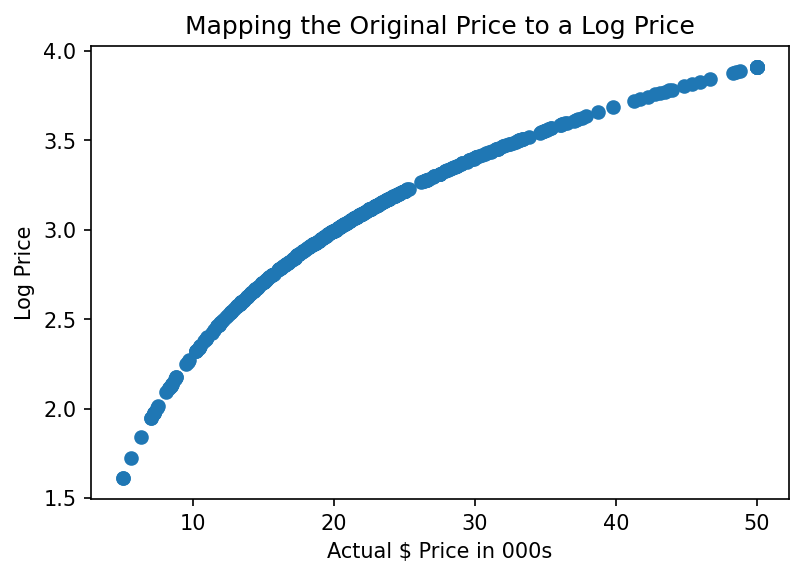

In [32]:
# 원래 집 값과 로그 변환 값으로 산점도 그리기 
plt.figure(dpi=150)                                      # 그래프 해상도 설정 
plt.scatter(data.PRICE, np.log(data.PRICE))              # 산점도 그래프 설정 - x축: 원 집 값 데이터, y축: 로그 변환 값 

plt.title('Mapping the Original Price to a Log Price')   # 그래프 제목 설정 
plt.ylabel('Log Price')                                  # y 레이블 설정 
plt.xlabel('Actual $ Price in 000s')                     # x 레이블 설정 

plt.show()

- 위의 그래프로 원 집 값과 그 가격의 로그 변환 값을 비교하여 시각화함으로써, 데이터의 분포가 로그 변환을 통해 어떻게 변화하는지 살펴볼 수 있다. 
- 로그 변환은 큰 값의 범위를 좁혀서 데이터의 분포를 더 잘 이해할 수 있게 도와준다.

## 로그 가격을 이용한 회귀 
- 로그 가격을 대신 사용하여 모델이 다음과 같이 변경되었다.

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

In [33]:
# 선형 회귀 모델을 사용하여 데이터의 로그 변환된 가격을 예측

# 타깃 데이터, Feature 설정
new_target = np.log(data['PRICE'])             # 타깃 데이터 - 로그 데이터로 변환
features = data.drop('PRICE', axis=1)          # 특성 데이터

# 데이터 나누기 - 로그 변환 데이터를 80(Train) 대 20(Test)를 무작위로 나누기
X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)
# 회귀 모델 정의 및 Train 데이터셋에 모델 적합 시키기 
log_regr = LinearRegression()                                   # 선형 회귀 모델 생성 
log_regr.fit(X_train, log_y_train)                              # 훈련 데이터를 사용하여 선형 회귀 모델 학습 
log_rsquared = log_regr.score(X_train, log_y_train)             # 학습된 모델의 성능 평가 - 결정 계수 값 사용

# 예측 값 및 잔차 계산 
log_predictions = log_regr.predict(X_train)                     # 학슴된 모델을 사용하여 훈련 데이터의 타겟 값 예측 
log_residuals = (log_y_train - log_predictions)                 # 실제 타겟 값과 에측 값 사이의 잔차 계산

# 결정 계수 측정
print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


- 이번에는 0.75와 비교하여 0.79의 r-제곱을 얻었다. 이는 괜찮은 개선이라고 보여진다.

## 로그 가격으로 계수 평가

In [34]:
# 로그 가격으로 계수 평가
df_coef = pd.DataFrame(data=log_regr.coef_,     # 로지스틱 회귀 모델 계수 - 해당 값은 모델이 학습한 각 피처의 가중치를 나타냄
                       index=X_train.columns,   # 데이터 프레임의 컬럼 이름들을 인덱스로 사용 
                       columns=['coef'])        # 컬럼명 지정
df_coef

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


- 위 계수들을 어떻게 해석할 수 있을까? 먼저 CHAS(찰스강 옆에 집이 있는지 여부)를 살펴보자. 강에 가까우면 CHAS의 계수가 0보다 크게 나타났다. 그렇기 때문에 해당 지역의 부동산 가격이 더 높게 나타난다. 즉, 강 옆의 집들의 가격은 높다고 해석 할 수 있다. 
- PTRATIO(마을별 학생-교사 비율)을 살펴보면, 교사당 학생 수가 많을 수록 음수로 나온다. 즉, 학생 대비 교사가 적을 수록 부정적인 영향을 끼친다. 

## 로그 가격 및 잔차 그래프를 사용한 회귀

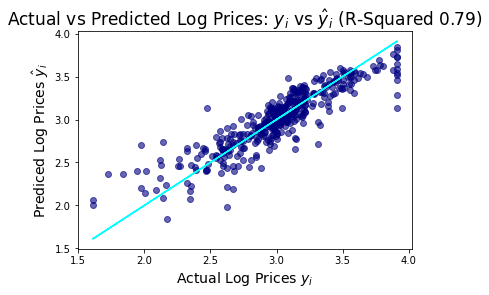

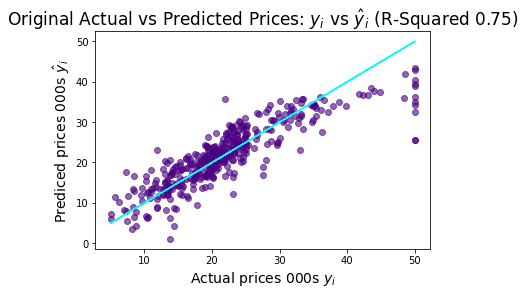

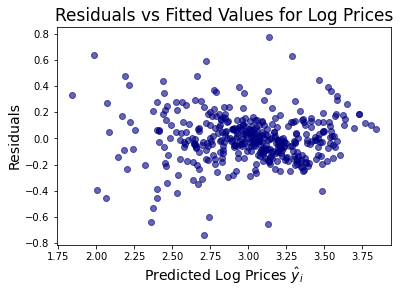

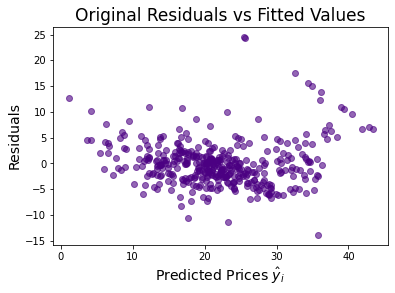

In [38]:
# 실제 집 가격 vs 로그 가격 
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# 로그 변환이 적용되지 않은 실제 가격 vs 예측 가격
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {r2:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# 잔차 vs 예측 값(로그 가격)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# 잔차 vs 예측 값
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

- 여기 각각의 그래프는 아래와 같은 해석을 해준다.
    1. 실제 로그 가격 vs 예측 로그 가격 - 첫 번째 그래프는 실제 로그 변환된 가격(log_y_train)과 예측된 로그 변환된 가격(log_predictions)을 비교한다. 점들이 대각선(log_y_train, log_y_train) 근처에 위치할수록 예측이 실제 가격에 가깝다는 것을 의미한다. 그래프의 제목에서 $R^2$ 값은 모델의 설명력을 나타내며, 이 값이 1에 가까울수록 모델의 성능이 좋음을 의미한다.

    2. 실제 가격 vs 예측 가격 - 두 번째 그래프는 로그 변환이 적용되지 않은 원래의 실제 가격(y_train)과 예측 가격(predicted_values)을 비교한다. 이 그래프도 첫 번째 그래프와 마찬가지로, 점들이 대각선(y_train, y_train) 근처에 위치할수록 모델의 예측이 정확하다는 것을 의미한다. 여기서도 $R^2$ 값이 모델의 성능을 나타낸다.

    3. 잔차 vs 예측 값(로그 가격) - 세 번째 그래프는 로그 변환된 가격에 대한 예측 값(log_predictions)과 잔차(log_residuals)의 관계를 보여준다. 잔차는 실제 값과 예측 값의 차이이며, 잔차가 무작위로 분포되어 있다면 모델이 데이터의 패턴을 잘 포착했다는 것을 의미한다.

    4. 잔차 vs 예측 값 - 마지막 그래프는 로그 변환이 적용되지 않은 원래의 예측 값(predicted_values)과 잔차(residuals)의 관계를 보여준다. 이 그래프도 세 번째 그래프와 같은 목적으로 사용되며, 잔차의 무작위 분포 여부를 통해 모델의 적합성을 판단할 수 있다.

- 이러한 그래프들은 회귀 모델의 진단과 평가에 중요한 도구로 사용되며, 모델이 데이터를 얼마나 잘 예측하는지, 예측에서의 오차 패턴은 어떤지를 이해하는 데 도움을 준다.
- 하지만 여기서 4개의 그래프로 차이점을 확인하기 어렵다. 예측값은 청록색 선에 약간 더 가까운 것 처럼 보이지만 여기서 차트를 해석데는 도움이 되지 않는다.

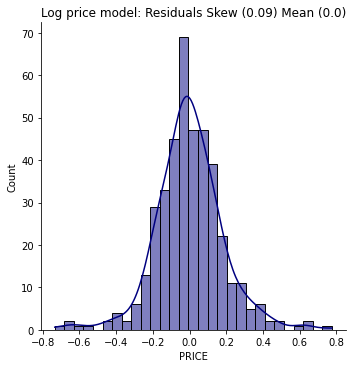

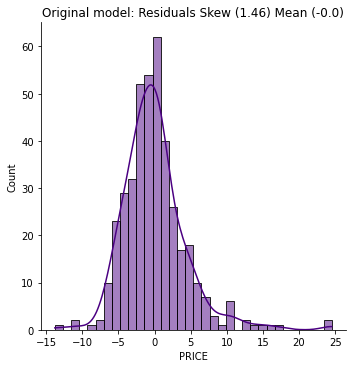

In [40]:
# 로그 가격 모델의 잔차 분석 - 로그 가격을 이용하여 잔차 평군과 왜곡 계산 
log_resid_mean = round(log_residuals.mean(), 2)    # 잔차 평균 
log_resid_skew = round(log_residuals.skew(), 2)    # 잔차 왜곡 

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

# 원래 모델의 잔차 분석 - 원래 가격을 이용한 잔차 평균과 잔차 왜곡 분석
sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({residuals_skew}) Mean ({residuals_mean})')
plt.show()

- 위의 그래프 중 첫 번째 그래프는 "로그 가격 모델의 잔차 분석"을 의미하고, 두 번째 그래프는 "원래 모델의 잔차 분석"을 의미한다.
- 두 그래프를 비교함으로써, 로그 변환을 사용한 회귀 모델이 원래 모델에 비해 잔차의 분포가 정규 분포에 더 가까운지, 왜곡도가 낮은지 등을 평가할 수 있다. 일반적으로, 잔차의 정규 분포에 가까울수록 회귀 모델의 성능이 좋다고 평가할 수 있다. 
- 위의 그래프를 비교해본 결과, 새로운 회귀 잔차(로그 가격 모델)의 왜곡은 오리지널 모델 1,46에 비해 0.09로 줄었으며, 평균은 여전히 약 0이다. 잔차 관점과 r-제곱 관점 모두에서 데이터 변환을 통해 모델을 개선했다고 볼 수 있다.